# Аналіз датасету баскетбольних гравців
У цьому аналізі ми розглянемо статистику баскетбольних гравців, використовуючи бібліотеки `pandas`, `seaborn`, та `matplotlib`. Ми побудуємо кілька графіків для візуалізації даних та виведемо короткі висновки для кожного з них.

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

players_df = pd.read_csv('hw_vis/Players.csv')
players_df.head()


,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [16]:
player_data_df = pd.read_csv('hw_vis/player_data.csv')
player_data_df.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [17]:
seasons_stats_df = pd.read_csv('hw_vis/Seasons_Stats.csv')
seasons_stats_df.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


## Створення нових фічей
Для більш глибокого аналізу створимо кілька нових показників, таких як:
1. Загальна кількість підбирань (`Total_Rebounds`),
2. Очки за гру (`Points_per_Game`),
3. Асисти за гру (`Assists_per_Game`),
4. Відкорегований рейтинг ефективності гравця (`PER_Adjusted`),
5. Коефіцієнт використання (`Usage_Rate`).

In [ ]:
seasons_stats_df['Total_Rebounds'] = seasons_stats_df['ORB'].fillna(0) + seasons_stats_df['DRB'].fillna(0)
seasons_stats_df['Points_per_Game'] = seasons_stats_df['PTS'] / seasons_stats_df['G']
seasons_stats_df['Assists_per_Game'] = seasons_stats_df['AST'] / seasons_stats_df['G']
seasons_stats_df['PER_Adjusted'] = seasons_stats_df['PER'] * seasons_stats_df['G']
seasons_stats_df['Usage_Rate'] = seasons_stats_df['PTS'] / seasons_stats_df['MP']

# Замінюємо всі значення "inf" та "-inf" на 0, якщо такі є
seasons_stats_df.replace([float('inf'), -float('inf')], 0, inplace=True)
seasons_stats_df.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,STL,BLK,TOV,PF,PTS,Total_Rebounds,Points_per_Game,Assists_per_Game,PER_Adjusted,Usage_Rate
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,217.0,458.0,0.0,7.269841,2.793651,NaN,NaN
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,NaN,NaN,NaN,99.0,279.0,0.0,5.693878,2.224490,NaN,NaN
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,NaN,NaN,NaN,192.0,438.0,0.0,6.537313,2.089552,NaN,NaN
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,NaN,NaN,NaN,29.0,63.0,0.0,4.200000,1.333333,NaN,NaN
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,NaN,NaN,NaN,27.0,59.0,0.0,4.538462,1.538462,NaN,NaN


### Розподіл очок за гру
Побудуємо гістограму для показу частоти очок за гру серед гравців.

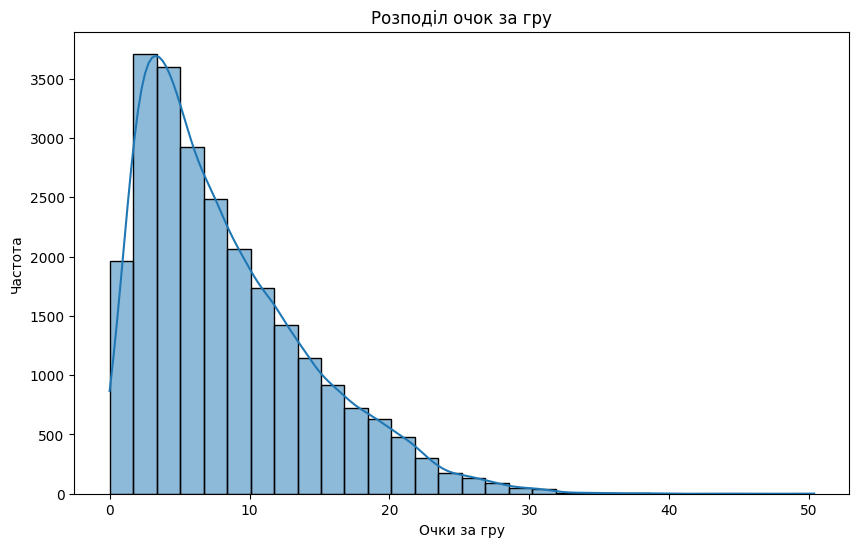

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(seasons_stats_df['Points_per_Game'].dropna(), bins=30, kde=True)
plt.title('Розподіл очок за гру')
plt.xlabel('Очки за гру')
plt.ylabel('Частота')
plt.show()

* Скупчення ліворуч: Якщо більшість даних зосереджені ближче до нижнього кінця шкали, це вказує на те, що більшість гравців набирає менше очок за гру.
* Правий хвіст: Якщо є кілька гравців, які набирають дуже високі очки за гру, це створить правий хвіст у розподілі.

### Розподіл асистів за гру
Аналогічно, розглянемо розподіл асистів за гру серед гравців.

Асисти (або передачі) — це один із важливих показників у баскетболі, який відображає кількість успішних передач, що безпосередньо привели до набраних очок.

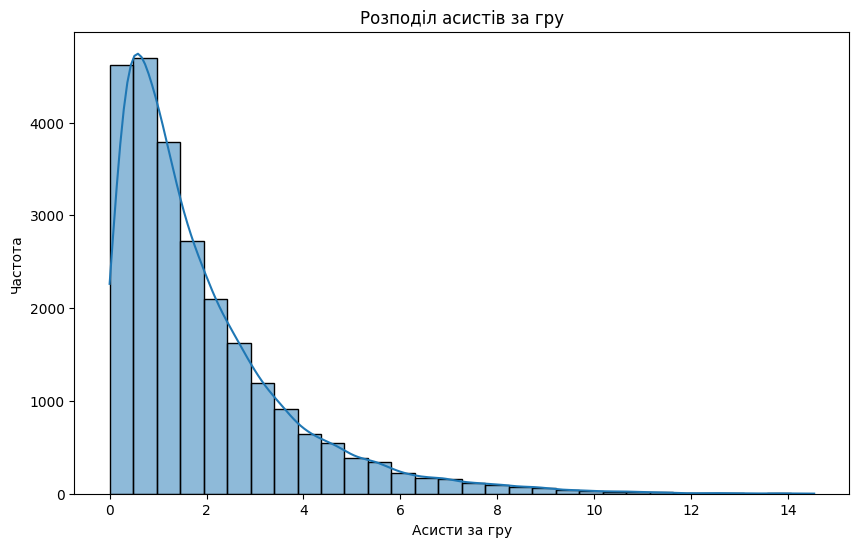

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(seasons_stats_df['Assists_per_Game'].dropna(), bins=30, kde=True)
plt.title('Розподіл асистів за гру')
plt.xlabel('Асисти за гру')
plt.ylabel('Частота')
plt.show()

* Скупчення біля нижчих значень: Якщо більшість гравців мають низькі значення асистів за гру, це може вказувати на те, що роль асистування здебільшого виконується певними ключовими гравцями.
* Правий хвіст: Якщо є невелика кількість гравців із високим середнім числом асистів за гру, це створює правий хвіст у розподілі, вказуючи на рідкісних, але дуже результативних у передачах гравців.

### Розподіл рейтингу ефективності гравця (PER)
Подивимось на розподіл рейтингу ефективності гравців (PER) для оцінки їх загального впливу.

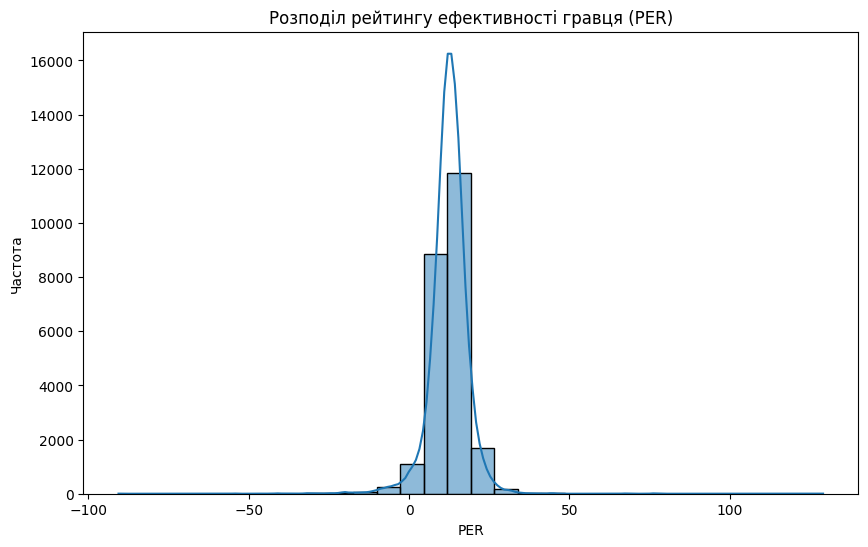

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(seasons_stats_df['PER'].dropna(), bins=30, kde=True)
plt.title('Розподіл рейтингу ефективності гравця (PER)')
plt.xlabel('PER')
plt.ylabel('Частота')
plt.show()

* Скупчення біля середнього: Якщо основна частина даних зосереджена навколо середніх значень, це підтверджує, що більшість гравців має типову ефективність (близько 15).
* Правий хвіст: Якщо є невелика кількість гравців із дуже високими значеннями PER, то це створить правий хвіст у розподілі, що вказує на рідкісних, але дуже ефективних гравців.

### Розподіл загальних підбирань
Розглянемо розподіл загальних підбирань серед гравців.

Підбирання — це коли гравець перехоплює м'яч після невдалого кидка.

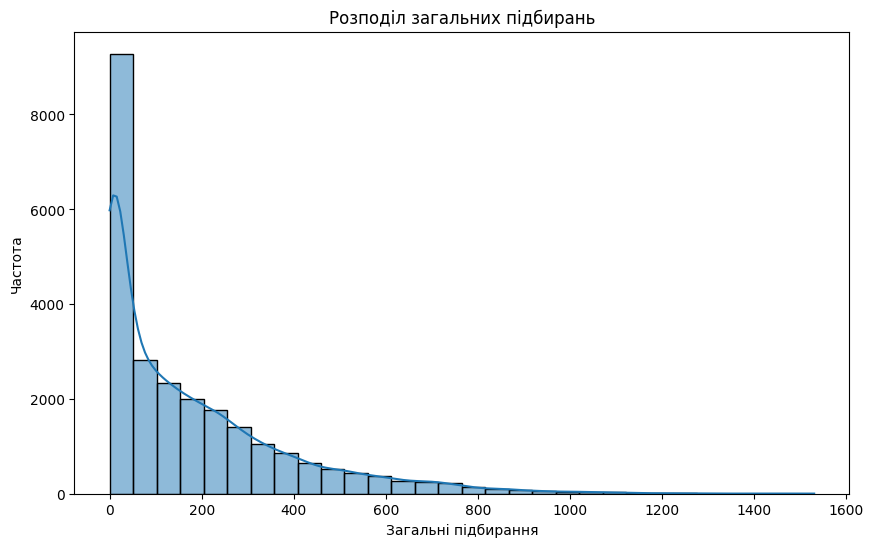

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(seasons_stats_df['Total_Rebounds'].dropna(), bins=30, kde=True)
plt.title('Розподіл загальних підбирань')
plt.xlabel('Загальні підбирання')
plt.ylabel('Частота')
plt.show()

* Скупчення на нижчому рівні: Якщо більшість гравців мають нижчу кількість підбирань, це вказує на те, що підбирання є спеціалізованим навиком, що більш характерний для гравців певних позицій.
* Невеликий хвіст праворуч: Якщо є кілька гравців з високими значеннями підбирань, це створює правий хвіст, вказуючи на рідкісних, але домінуючих гравців у підбираннях.


### Середні очки за сезони
Побудуємо лінійний графік для аналізу середніх очок за гру, щоб побачити зміну середнього рівня результативності з роками.

Цей графік показує, як середні очки за гру змінювалися протягом різних сезонів. Це дозволяє відстежити загальну тенденцію змін у результативності гравців.

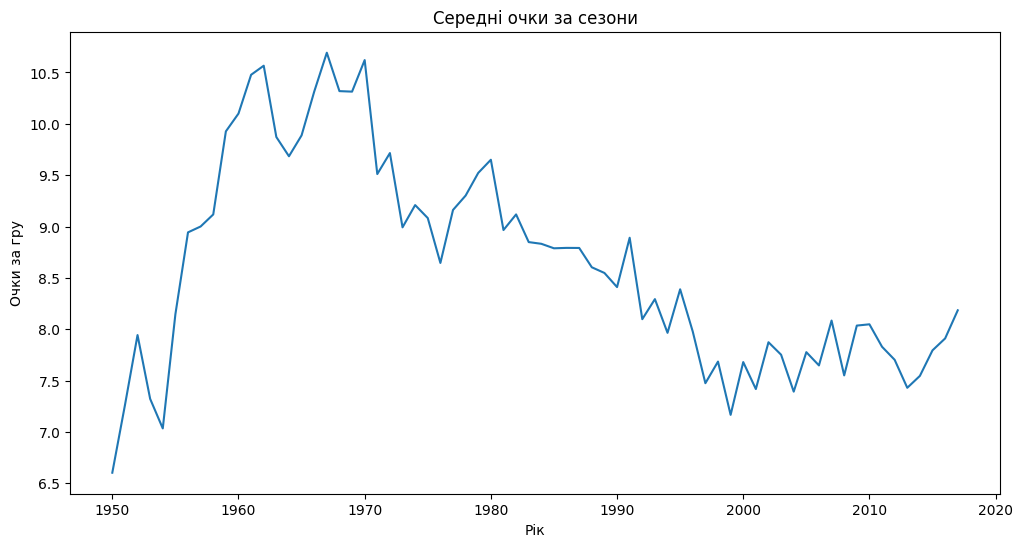

In [23]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=seasons_stats_df['Year'], y=seasons_stats_df['Points_per_Game'], errorbar=None)
plt.title('Середні очки за сезони')
plt.xlabel('Рік')
plt.ylabel('Очки за гру')
plt.show()


* Зростаюча тенденція: Якщо середні очки за гру зростають з роками, це може свідчити про зміни в стилі гри, такі як збільшення темпу гри або акцент на атакуючій грі.
* Періоди спадів: Якщо є періоди, коли середні очки за гру знижуються, це може бути пов'язано зі змінами в правилах, стилі гри або підходах до тренувань.

### Щільність розподілу PER та Points_per_Game
Цей графік покаже, як ефективність гравця PER (Player Efficiency Rating) корелює із середніми очками за гру.

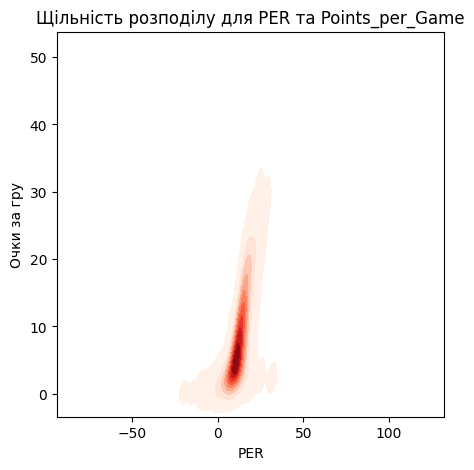

In [24]:
plt.figure(figsize=(5, 5))
sns.kdeplot(
    x=seasons_stats_df['PER'].dropna(), 
    y=seasons_stats_df['Points_per_Game'].dropna(), 
    cmap="Reds", fill=True, thresh=0.01
)
plt.title('Щільність розподілу для PER та Points_per_Game')
plt.xlabel('PER')
plt.ylabel('Очки за гру')
plt.show()


Аналіз
 * Скупчення в центрі: Більшість гравців мають відносно низькі значення PER та середні значення очок за гру, що видно з темнішого відтінку в центрі графіка. Це вказує на те, що середня ефективність і результативність є поширеними серед гравців.
 * Високі значення PER і Points_per_Game: У графіку спостерігається невелика кількість гравців з високими значеннями як PER, так і очок за гру, що підтверджує, що високоефективні та результативні гравці рідкісні.

Цей графік допомагає зрозуміти зв'язок між ефективністю гравця та його результативністю. ​

### Розподіл кількості ігор, зіграних гравцями за сезон

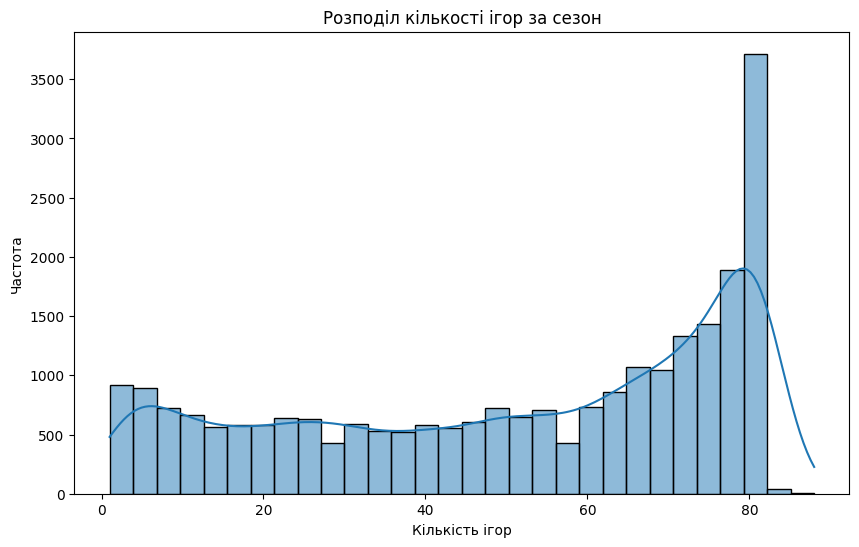

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(seasons_stats_df['G'].dropna(), bins=30, kde=True)
plt.title('Розподіл кількості ігор за сезон')
plt.xlabel('Кількість ігор')
plt.ylabel('Частота')
plt.show()


Цей графік показує, скільки ігор зазвичай грають гравці за сезон. Часто можна побачити, що більшість гравців грають велику кількість ігор, що вказує на стабільність складу в команді. Проте є гравці, які беруть участь лише в декількох іграх, можливо через травми або специфічну роль у команді.

### Середня вага гравців за сезони

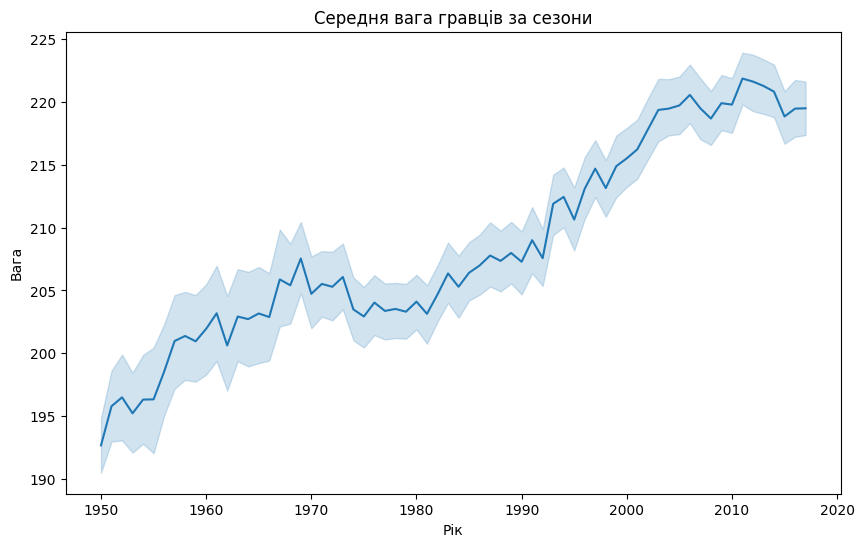

In [26]:
# merges
merged_df = pd.merge(seasons_stats_df, player_data_df, left_on='Player', right_on='name', how='inner')

plt.figure(figsize=(10, 6))
sns.lineplot(x=merged_df['Year'], y=merged_df['weight'].dropna())
plt.title('Середня вага гравців за сезони')
plt.xlabel('Рік')
plt.ylabel('Вага')
plt.show()

Загальний тренд: Якщо середня вага гравців має тенденцію до зростання з роками, це може свідчити про зміну фізичних вимог до гравців у баскетболі. Зокрема, сучасна гра вимагає більшої сили та витривалості, що може відображатись у збільшенні середньої ваги.

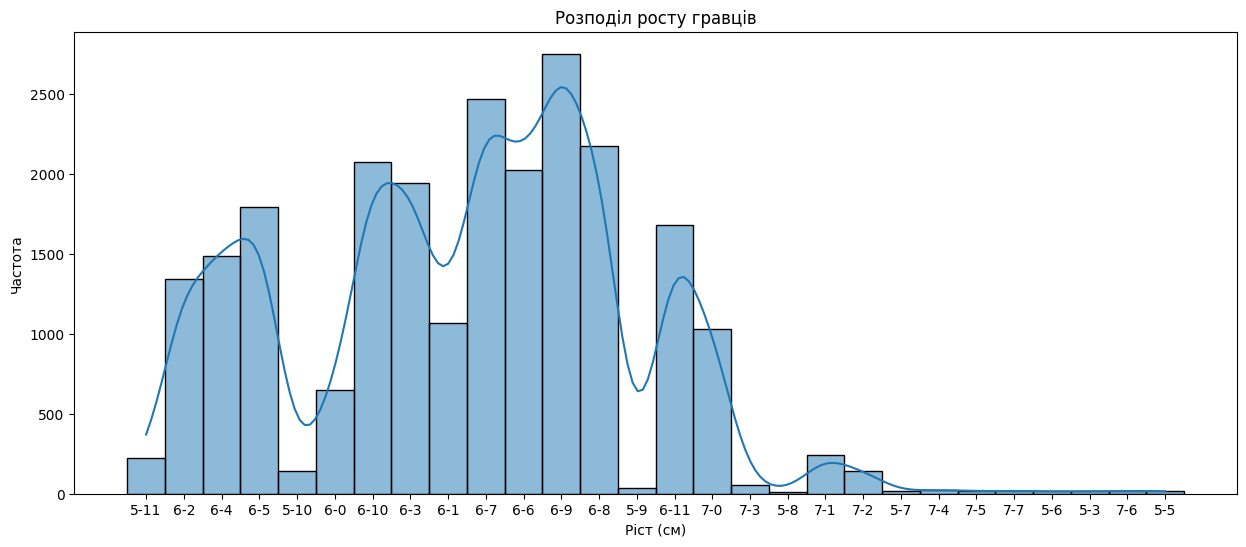

In [27]:
plt.figure(figsize=(15, 6))
sns.histplot(merged_df['height'].dropna(), bins=20, kde=True)
plt.title('Розподіл росту гравців')
plt.xlabel('Ріст (см)')
plt.ylabel('Частота')
plt.show()


Якщо графік має довгий правий хвіст, це вказує на невелику кількість гравців з дуже високими значеннями росту, які значно перевищують середній зріст. Такі гравці, як правило, грають на позиціях, що вимагають високого росту, наприклад, на позиції центрового.

### Середні очки, набрані гравцями за позиціями

Цей графік показує, скільки очок в середньому набирають гравці різних позицій. Це може дати уявлення про те, які позиції вимагають від гравців більшої результативності.

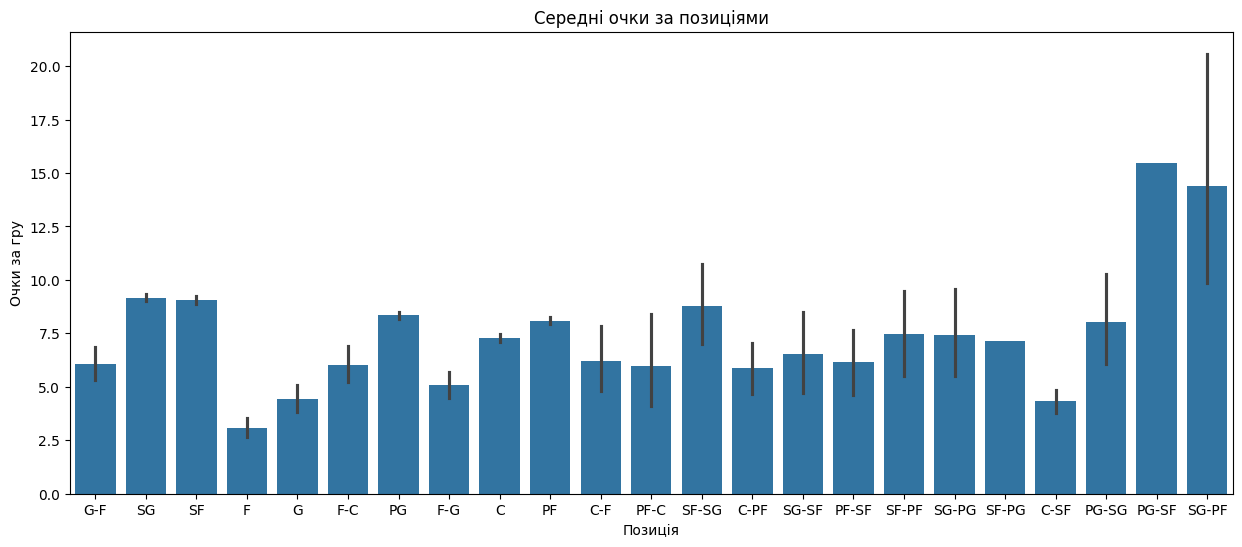

In [28]:
plt.figure(figsize=(15, 6))
sns.barplot(x=seasons_stats_df['Pos'], y=seasons_stats_df['Points_per_Game'])
plt.title('Середні очки за позиціями')
plt.xlabel('Позиція')
plt.ylabel('Очки за гру')
plt.show()


Цей графік показує, що середні очки гравців сильно залежать від позиції, на якій вони грають, відображаючи різні ролі та завдання на полі.